# Nigeria Telecom Attrition

### Loading necessary libraries and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading the Dataset
df = pd.read_csv('C:\\Users\\USER\\Downloads\\Personal FOLDER\\3MTT DS_ML\\mtn_customer_churn.csv')


### Checking for the description and summary of the dataset

In [2]:

# 2. Data Description
print(df.info())

#the Statistical Summary
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

### The sum of the missing values of the dataset

In [ ]:
# 3. Data Cleaning for Visualization
# since 'Reasons for Churn' is only present for churners, so we leave it as NaN for non-churners.
# checking for Missing Values 
print(df.isnull().sum())

Customer ID                    0
Full Name                      0
Date of Purchase               0
Age                            0
State                          0
MTN Device                     0
Gender                         0
Satisfaction Rate              0
Customer Review                0
Customer Tenure in months      0
Subscription Plan              0
Unit Price                     0
Number of Times Purchased      0
Total Revenue                  0
Data Usage                     0
Customer Churn Status          0
Reasons for Churn            690
dtype: int64


### Classifying customer churn to a numerical variable, grouping of the age variable

In [4]:
# Create Binary Churn column for calculations (1=Yes, 0=No)
df['Churn_Binary'] = df['Customer Churn Status'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create Age Groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Create New Features: Revenue per Month & Usage per Month
# 0 in the tenure are replaced with 1 to avoid division by zero errors
df['Tenure_Adj'] = df['Customer Tenure in months'].replace(0, 1)
df['Revenue per Month'] = df['Total Revenue'] / df['Tenure_Adj']
df['Usage per Month'] = df['Data Usage'] / df['Tenure_Adj']


### Exploratory data analysis

##### Visualisation of the data

Saved: viz_churn_distribution.png


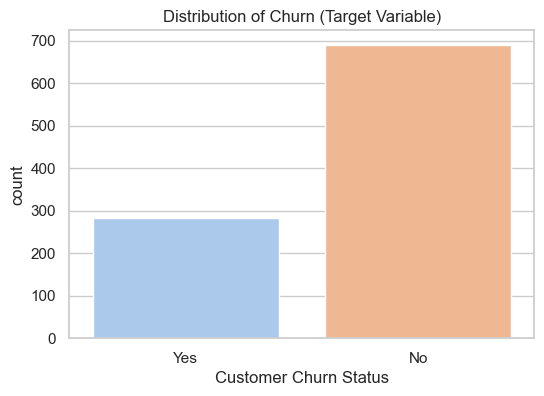

In [5]:
# 4. Visualizations 
# Set the style
sns.set_theme(style="whitegrid")
# --- Visual 1: Target Distribution (How many churned?) ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Customer Churn Status', data=df, hue='Customer Churn Status', legend=False, palette='pastel')
plt.title('Distribution of Churn (Target Variable)')
plt.savefig('viz_churn_distribution.png')
print("Saved: viz_churn_distribution.png")

### Visual of reasons why customer churn

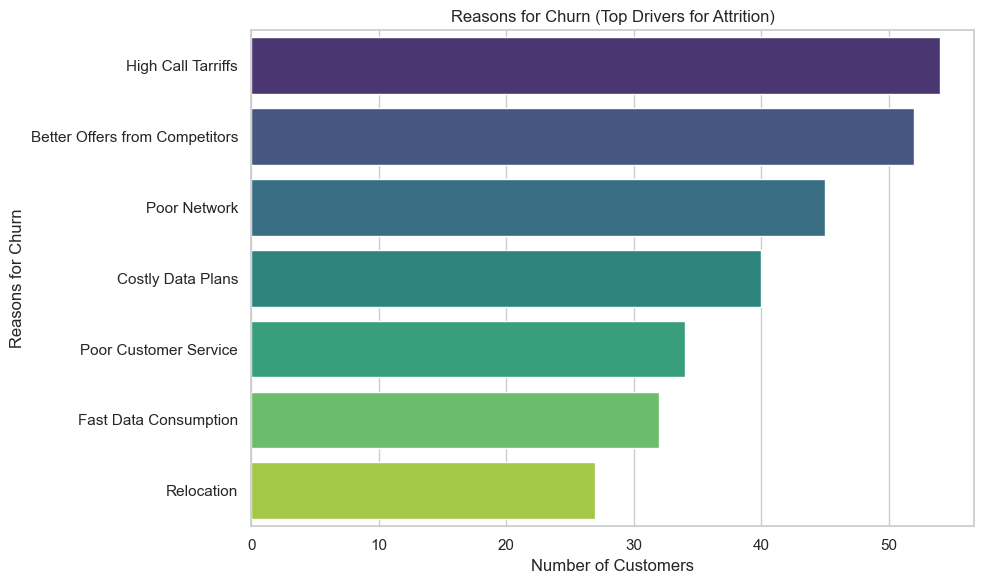

In [6]:
# --- Visual 2: Top Reasons for Churn 
plt.figure(figsize=(10, 6))
churn_reasons = df['Reasons for Churn'].value_counts()
ax1 = sns.barplot(x=churn_reasons.values, y=churn_reasons.index, hue=churn_reasons.index, palette='viridis')
plt.title('Reasons for Churn (Top Drivers for Attrition)')
plt.xlabel('Number of Customers')
plt.tight_layout()
plt.savefig('viz_churn_reasons.png')
plt.show()

### Churn rate by each state

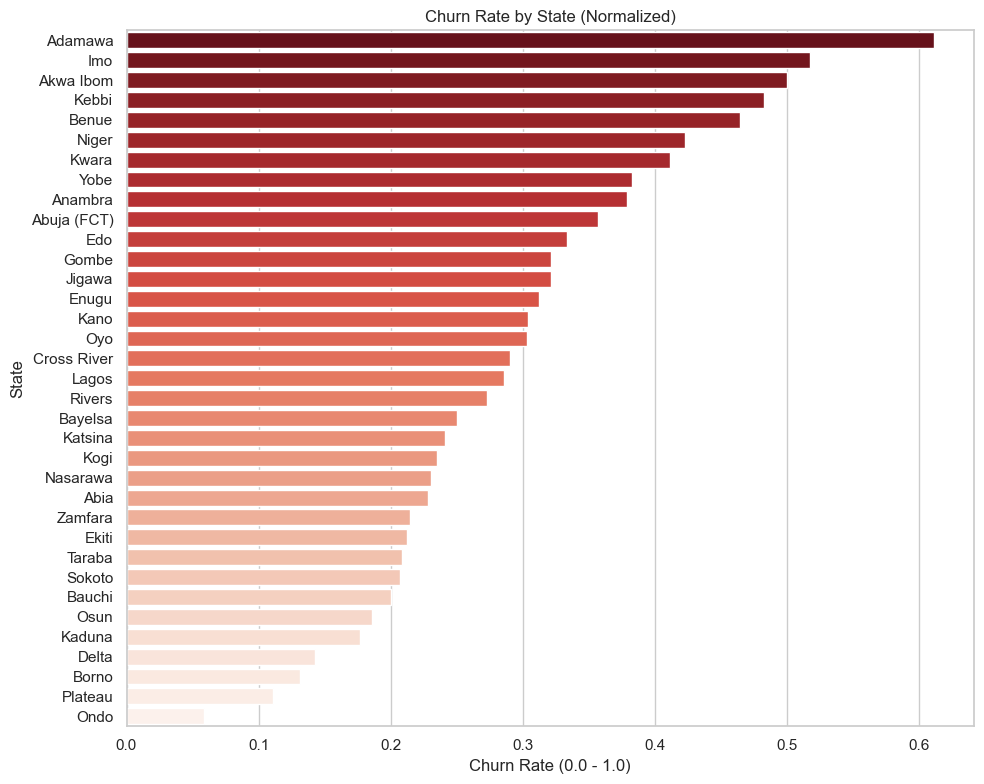

In [36]:
# --- Visual 3:  Churn Rate by State (Normalized)
# We calculate the mean of 'Churn_Binary' to get the rate (percentage)
state_churn = df.groupby('State')['Churn_Binary'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
ax2 = sns.barplot(x=state_churn.values, y=state_churn.index, hue=state_churn.index, palette='Reds_r')
plt.title('Churn Rate by State (Normalized)')
plt.xlabel('Churn Rate (0.0 - 1.0)')
plt.tight_layout()
plt.savefig('viz_churn_distribution_by_state.png')
plt.show()

### Satisfaction rate per state with respect to how they churn

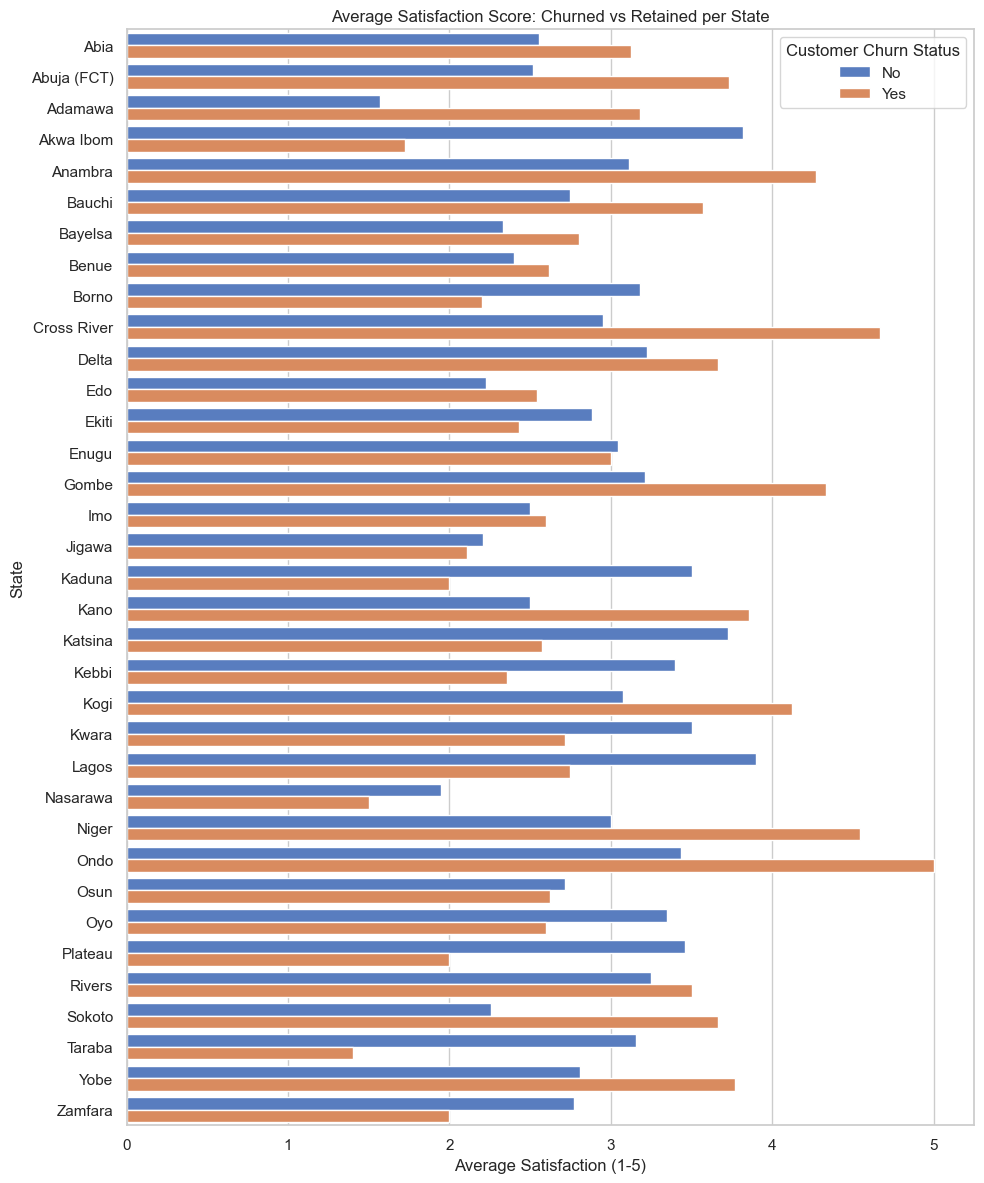

In [35]:

# --- Visual 4: Satisfaction Rate per State vs Churn ---
# We compare Avg Satisfaction of Churners vs Retained users per State
state_sat = df.groupby(['State', 'Customer Churn Status'])['Satisfaction Rate'].mean().reset_index()
plt.figure(figsize=(10, 12))
sns.barplot(y='State', x='Satisfaction Rate', hue='Customer Churn Status', data=state_sat, palette='muted')
plt.title('Average Satisfaction Score: Churned vs Retained per State')
plt.xlabel('Average Satisfaction (1-5)')
plt.tight_layout()
plt.savefig('viz_satisfaction_rate_by_state.png')
plt.show()

### Churn by satisfaction rate

Saved: viz_churn_by_satisfaction.png


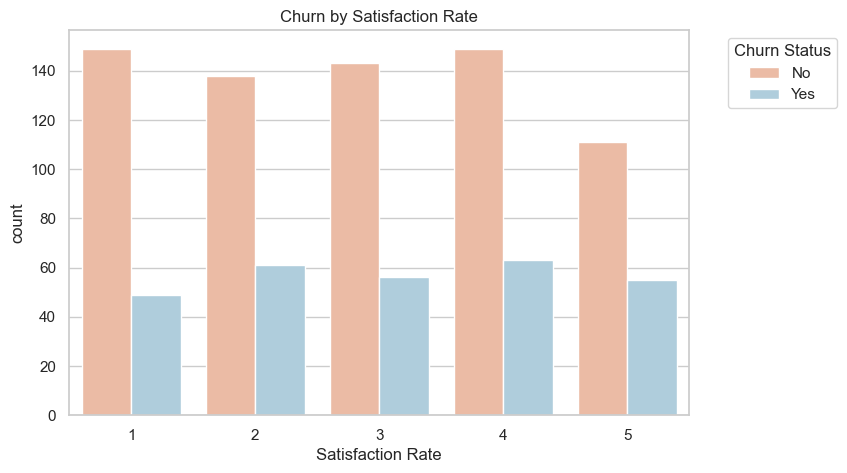

In [28]:
# --- Visual 5: Churn by Satisfaction Rate ---
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfaction Rate', hue='Customer Churn Status', data=df, palette='RdBu')
plt.title('Churn by Satisfaction Rate')
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('viz_churn_by_satisfaction.png')
print("Saved: viz_churn_by_satisfaction.png")

### Churn by Gender

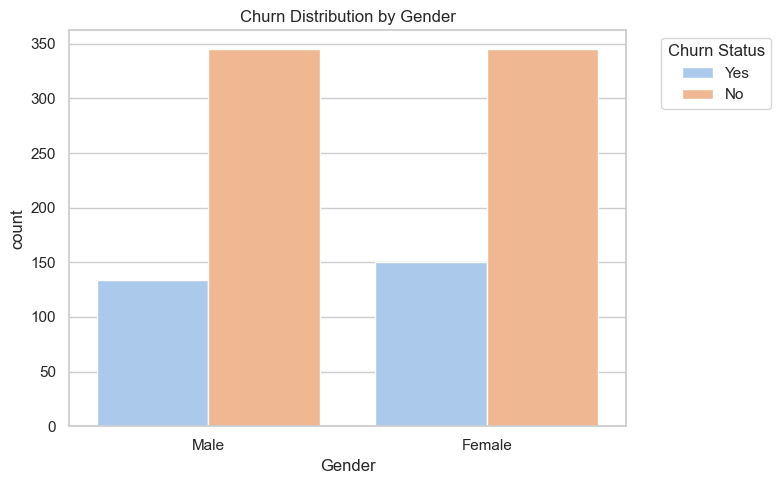

In [37]:
# --- Visual 6: Churn by Gender
plt.figure(figsize=(8, 5)) 
sns.countplot(x='Gender', hue='Customer Churn Status', data=df, palette='pastel')
plt.title('Churn Distribution by Gender')
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('viz_churn_distribution_by_gender.png')
plt.show()

### Churn by Device

Saved: viz_churn_by_device.png


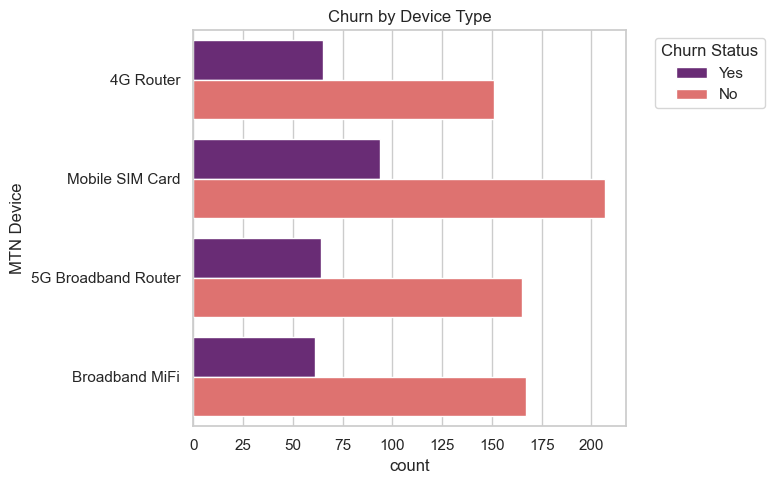

In [33]:
# --- Visual 7: Churn by Device ---
plt.figure(figsize=(8, 5))
sns.countplot(y='MTN Device', hue='Customer Churn Status', data=df, palette='magma')
plt.title('Churn by Device Type')
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('viz_churn_by_device.png')
print("Saved: viz_churn_by_device.png")

### Subscription plans with the highest churn

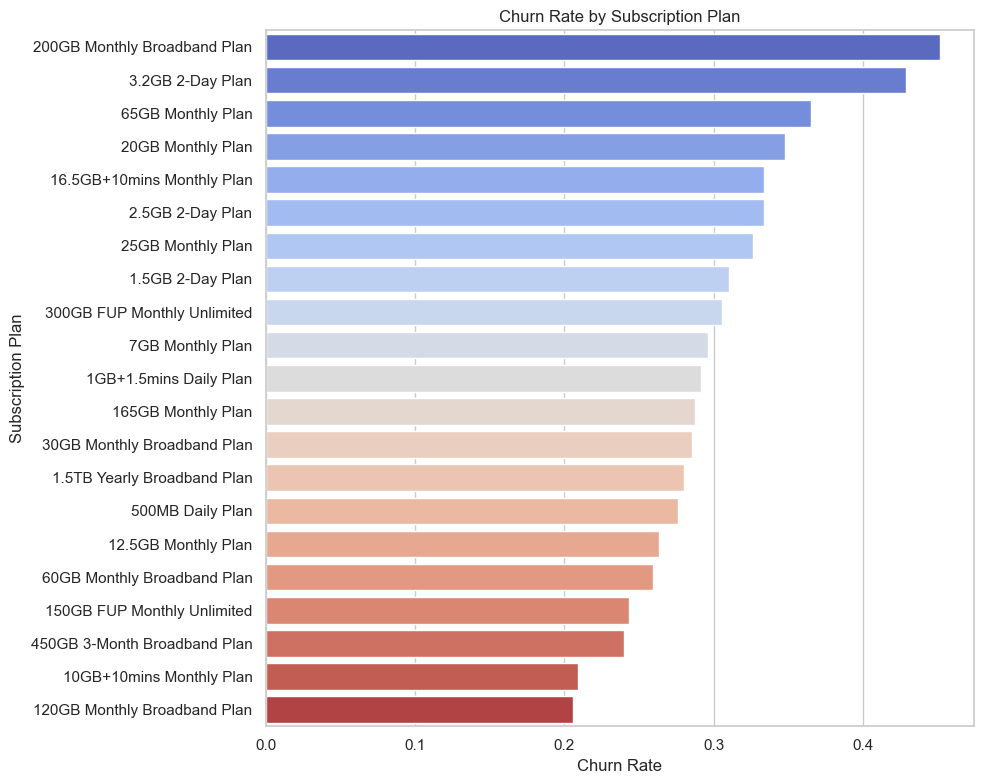

In [34]:
#--- Visual 8:  Subscription Plans with High Churn
plan_churn = df.groupby('Subscription Plan')['Churn_Binary'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
ax5 = sns.barplot(x=plan_churn.values, y=plan_churn.index, hue=plan_churn.index, palette='coolwarm')
plt.title('Churn Rate by Subscription Plan')
plt.xlabel('Churn Rate')
plt.tight_layout()
plt.savefig('viz_churn_by_subscription_plan.png')
plt.show()

### High priced plan with respect to how they churn

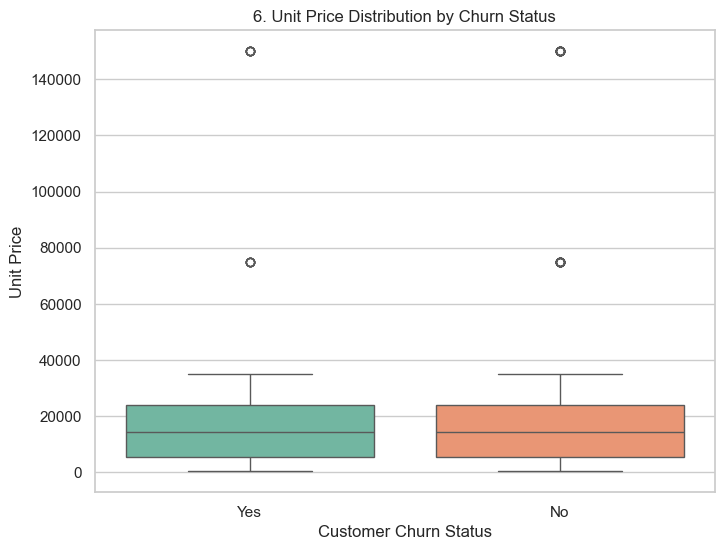

In [13]:
#--- Visual 9: High-priced plans vs Churn (Unit Price)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer Churn Status', y='Unit Price', data=df, palette='Set2', hue='Customer Churn Status')
plt.title('6. Unit Price Distribution by Churn Status')
plt.savefig('viz_unit_price_by_churn.png')
plt.show()

### Churn by Gender, Age group, and the Device use

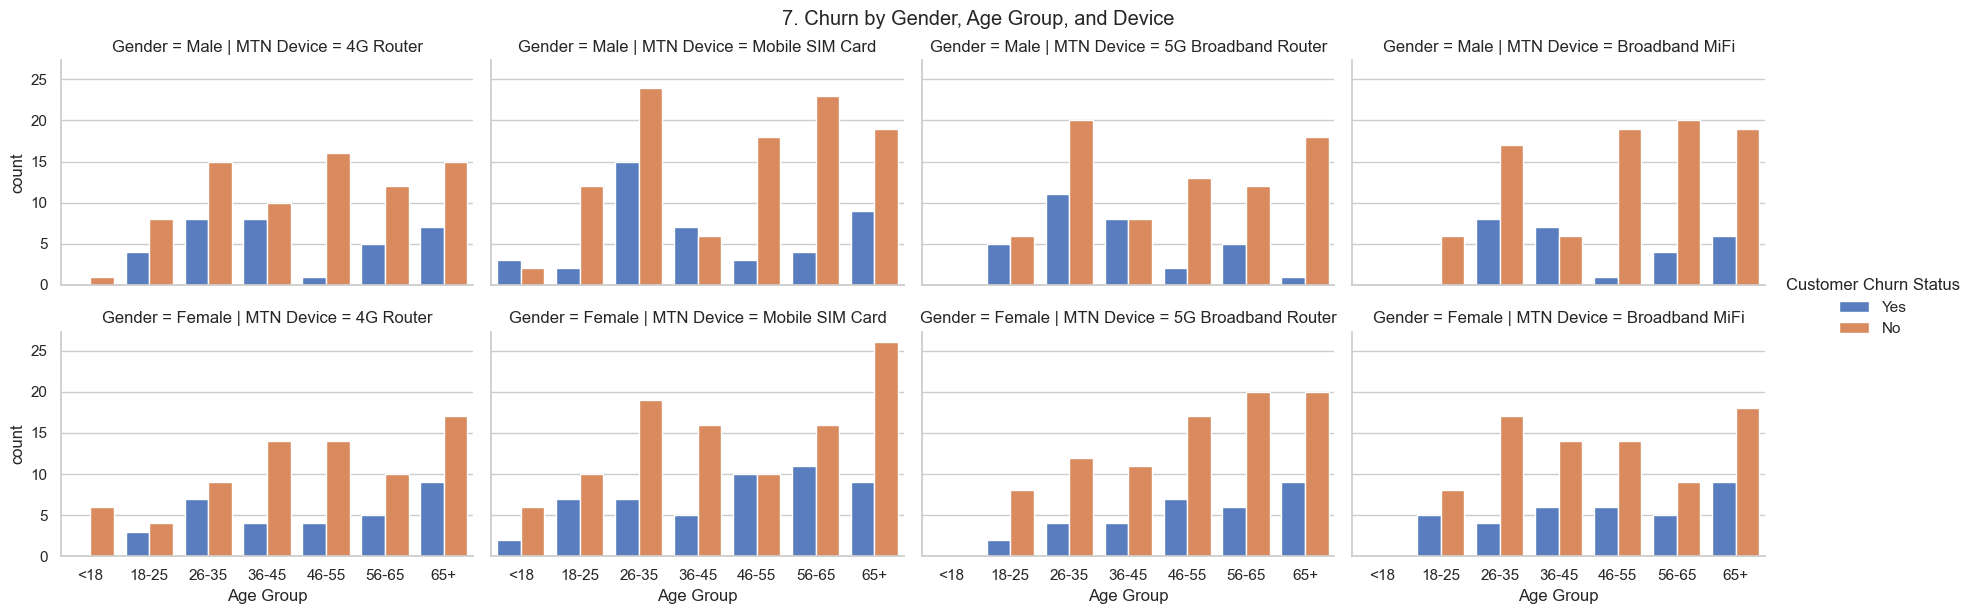

In [14]:
#--- Visual 10: Multivariate Analysis: Churn by Gender + Age Group + Device
g = sns.catplot(
    data=df, kind="count",
    x="Age Group", hue="Customer Churn Status",
    col="MTN Device", row="Gender",
    height=3, aspect=1.5, palette="muted"
)
g.fig.suptitle('7. Churn by Gender, Age Group, and Device', y=1.02)
plt.savefig('viz_churn_multivariate.png')
plt.show()

### Model Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# 2. Feature Selection
cols_to_drop = ['Customer ID', 'Full Name', 'Date of Purchase', 'Reasons for Churn', 'Customer Churn Status']
X = df.drop(cols_to_drop, axis=1)
y = df['Customer Churn Status']

# 3. We Split the Data
# Stratify ensures the test set has the same proportion of Churners as the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Define Preprocessing
categorical_features = ['State', 'MTN Device', 'Gender', 'Customer Review', 'Subscription Plan']
numerical_features = ['Age', 'Satisfaction Rate', 'Customer Tenure in months', 'Unit Price', 
                      'Number of Times Purchased', 'Total Revenue', 'Data Usage']

# Preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# we transform the training data to numbers
preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)

# Now, we apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)


# Count churners by checking equality to 'Yes'
orig_churners = (y_train == 'Yes').sum()
new_churners = (y_train_resampled == 'Yes').sum()

print(f"Original Training Size: {len(y_train)} (Churners: {orig_churners})")
print(f"New SMOTE Training Size: {len(y_train_resampled)} (Churners: {new_churners})")

# 6. Train Model on Synthetic Data
print("Training Gradient Boosting Model...")
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# 7. Create & Save the Final Pipeline

final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf)
])

# 8. Evaluate on REAL Test Data
y_pred = final_model.predict(X_test)

print("\n--- Model Performance (with SMOTE) ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Original Training Size: 779 (Churners: 227)
New SMOTE Training Size: 1104 (Churners: 552)
Training Gradient Boosting Model...

--- Model Performance (with SMOTE) ---
Accuracy: 0.7282051282051282

Classification Report:
               precision    recall  f1-score   support

          No       0.80      0.83      0.81       138
         Yes       0.54      0.49      0.51        57

    accuracy                           0.73       195
   macro avg       0.67      0.66      0.66       195
weighted avg       0.72      0.73      0.72       195

